<a href="https://colab.research.google.com/github/Samragya013/Tree-Classification-Project/blob/main/Tree_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from collections import defaultdict
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data_dir = '/content/drive/MyDrive/Tree_Species_Dataset'

In [12]:
# Check folder names (species classes)
import os
print("Class folders:")
print(os.listdir(data_dir))

Class folders:
['amla', 'simlo', 'shirish', 'sitafal', 'pipal', 'nilgiri', 'motichanoti', 'other', 'mango', 'sonmahor', 'vad', 'pilikaren', 'sugarcane', 'neem', 'saptaparni', 'gunda', 'banyan', 'bamboo', 'bili', 'garmalo', 'khajur', 'kanchan', 'champa', 'asopalav', 'coconut', 'jamun', 'gulmohor', 'cactus', 'babul', 'kesudo', '.git']


In [13]:
class_counts = defaultdict(int)

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path) and not class_name.startswith('.'):
        class_counts[class_name] = len([
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f))
        ])


In [14]:
# Print image count per class
print("Number of images per class:")
for cls, count in sorted(class_counts.items()):
    print(f"{cls:20s} : {count}")

Number of images per class:
amla                 : 50
asopalav             : 50
babul                : 50
bamboo               : 50
banyan               : 50
bili                 : 50
cactus               : 50
champa               : 50
coconut              : 50
garmalo              : 50
gulmohor             : 50
gunda                : 50
jamun                : 50
kanchan              : 50
kesudo               : 50
khajur               : 50
mango                : 50
motichanoti          : 50
neem                 : 50
nilgiri              : 50
other                : 150
pilikaren            : 50
pipal                : 50
saptaparni           : 50
shirish              : 50
simlo                : 50
sitafal              : 50
sonmahor             : 50
sugarcane            : 50
vad                  : 50


In [15]:
print("Total images:", sum(class_counts.values()))
print("Total classes:", len(class_counts))

Total images: 1600
Total classes: 30


In [16]:
image_shapes = []

for cls in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, cls)
    if os.path.isdir(folder_path) and not cls.startswith('.'):
        for img_file in os.listdir(folder_path)[:10]:  # check first 10 from each class
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                h, w, c = img.shape
                image_shapes.append((h, w, c))

# Convert to NumPy array to get statistics
shape_array = np.array(image_shapes)

print("Image shape stats (from sample):")
print(f"Min Height x Width : {shape_array[:,0].min()} x {shape_array[:,1].min()}")
print(f"Max Height x Width : {shape_array[:,0].max()} x {shape_array[:,1].max()}")
print(f"Mean Height x Width: {shape_array[:,0].mean():.2f} x {shape_array[:,1].mean():.2f}")
print(f"Channels detected  : {np.unique(shape_array[:,2])}")


Image shape stats (from sample):
Min Height x Width : 148 x 148
Max Height x Width : 4032 x 4000
Mean Height x Width: 350.69 x 393.18
Channels detected  : [3]


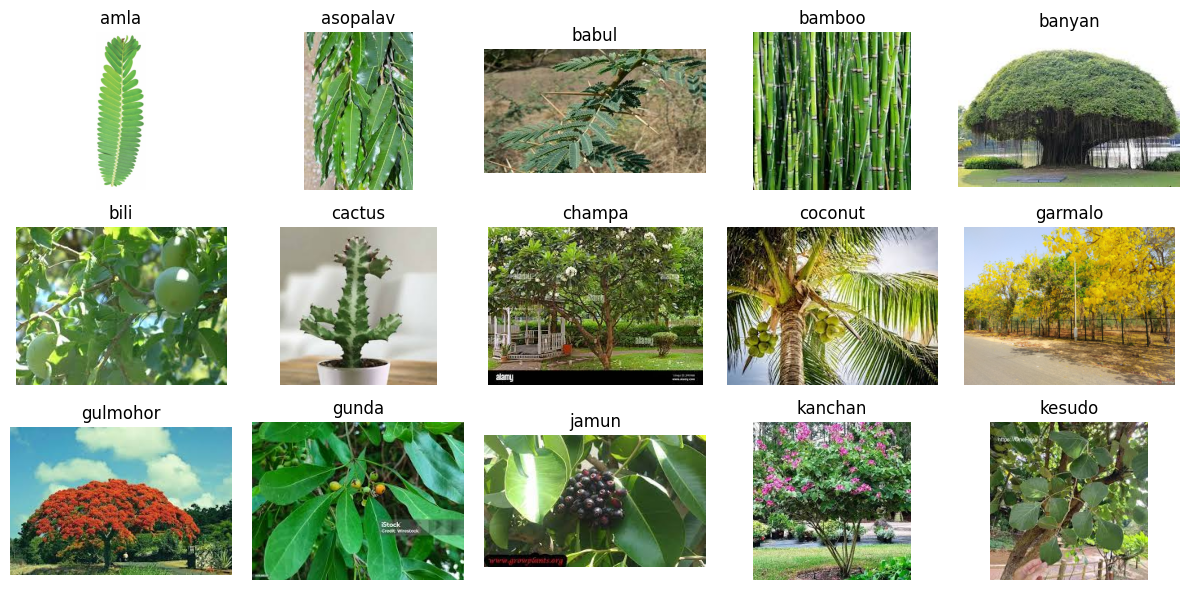

In [17]:
plt.figure(figsize=(12, 6))

i = 0
for cls in sorted(os.listdir(data_dir)):
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path) and not cls.startswith('.'):
        files = os.listdir(cls_path)
        if files:
            img_path = os.path.join(cls_path, files[0])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(3, 5, i + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
            i += 1
        if i == 15:  # show 15 images only
            break

plt.tight_layout()
plt.show()
